In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Load signals

In [52]:
df = pd.read_csv('./data/wind-farm-1-signals-2016.csv', sep=';')
df = pd.concat([df, pd.read_csv('./data/wind-farm-1-signals-2017.csv', sep=';')])

# date format
df.Timestamp = pd.to_datetime(df.Timestamp.str[:-6])

# assure 10min each
df = df.set_index(['Timestamp']).groupby(['Turbine_ID']).resample('10min').mean().reset_index().sort_values(by=['Turbine_ID','Timestamp'])

df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01 00:00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,30.0,44.0,48.0,28.0,11.3,10.9,11.1,11.6,0.5,3.3,0.9,-12.4,206.1,18.0,-107.0,4420.0,0.0,4313.0,-99.0,-5636.0,0.0,-5735.0,68.0,76.0,65.0,39.0,39.0,28.0,43.0,25.0,20.0,-1.1,4.5,0.6,0.9,91.0,39.0,39.0,38.0,39.0,26.2,0.7,50.0,401.6,399.9,399.2,46.5,61.1,45.5,118.4,-33.5,38.0,0.1,3.6,35.3,-34.9,13.2,-100.0,36.2,29.4,119.3,0.0,31.9,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37.0,218.5
1,T01,2016-01-01 00:10:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,30.0,44.0,48.0,28.0,11.2,0.0,8.8,12.5,0.4,3.2,0.9,-1.1,217.4,18.0,-753.0,2488.0,0.0,1735.0,-867.0,-3871.0,0.0,-4738.0,68.0,76.0,65.0,38.0,39.0,28.0,42.0,25.0,20.0,-0.9,59.6,8.1,14.7,91.0,37.0,36.0,37.0,37.0,10.1,0.7,50.0,401.9,400.7,399.5,34.3,41.9,33.6,101.5,-38.2,38.0,4.0,3.3,30.2,-28.0,1.8,-100.1,34.6,21.7,102.3,0.0,24.7,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37.0,218.5
2,T01,2016-01-01 00:20:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,30.0,43.0,46.0,29.0,12.3,1.9,6.8,8.8,0.7,4.3,1.0,-5.8,207.4,18.0,-784.0,10488.0,0.0,9704.0,-410.0,-1865.0,0.0,-2275.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.2,24.0,10.4,12.4,87.0,38.0,37.0,37.0,38.0,59.0,0.7,50.0,401.4,400.5,398.8,78.6,92.7,86.1,219.4,-34.1,38.0,4.3,4.1,77.5,-13.9,999.9,-108.1,154.8,88.9,224.9,0.0,54.3,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37.0,213.3
3,T01,2016-01-01 00:30:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,30.0,44.0,48.0,28.0,11.5,10.7,11.1,9.9,0.7,4.4,1.1,9.6,232.0,18.0,0.0,22673.0,0.0,22673.0,0.0,-15822.0,0.0,-15822.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-1.9,0.9,-0.5,0.8,87.0,38.0,38.0,38.0,38.0,135.7,0.8,50.0,399.7,398.1,396.9,128.1,160.8,136.8,250.3,-27.7,38.0,0.1,4.6,53.9,-94.9,0.0,-105.1,18.4,135.3,261.4,0.0,53.1,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36.0,222.4
4,T01,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,30.0,44.0,48.0,28.0,11.7,10.8,11.1,9.9,0.8,4.1,1.2,23.3,245.6,18.0,-75.0,16581.0,0.0,16506.0,-79.0,-13314.0,0.0,-13394.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.0,4.4,-0.1,1.2,88.0,39.0,38.0,38.0,39.0,98.9,0.7,50.0,399.5,397.9,396.8,104.7,130.3,108.3,212.5,-50.2,38.0,0.2,4.3,65.9,-80.3,17.8,-107.1,35.8,102.7,221.8,0.0,60.2,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36.0,222.4


### Load logs

In [53]:
# read logs 2016
df_logs_16 = pd.read_csv('./data/wind-farm-1-logs-2016.csv', sep=';')
df_logs_16 = df_logs_16.rename(columns={'TimeDetected':'Timestamp','TimeReset':'Time_Reset', 'UnitTitle':'Turbine_ID'})

# date format
df_logs_16.Timestamp = pd.to_datetime(df_logs_16.Timestamp.str[:-6])
df_logs_16.Time_Reset = pd.to_datetime(df_logs_16.Time_Reset)

# read logs 2017
df_logs_17 = pd.read_csv('./data/wind-farm-1-logs-2017.csv', sep=';')
df_logs_17 = df_logs_17.rename(columns={'Time_Detected':'Timestamp','Turbine_Identifier':'Turbine_ID'})

# date format
df_logs_17.Timestamp = pd.to_datetime(df_logs_17.Timestamp.str[:-6])
df_logs_17.Time_Reset = pd.to_datetime(df_logs_17.Time_Reset.str[:-6])

# concat
df_logs = pd.concat([df_logs_16, df_logs_17]).dropna(how='all', axis=1).dropna(subset=['Timestamp']).sort_values(by=['Timestamp'])

df_logs.head()

/tmp/ipykernel_1043/3510147951.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_logs_17 = pd.read_csv('./data/wind-farm-1-logs-2017.csv', sep=';')


,Timestamp,Time_Reset,Turbine_ID,Remark,Unit_Title_Destination
68215,2016-01-01 00:02:18,NaT,T11,External power ref.:2000kW,NaN
21311,2016-01-01 00:07:15,NaT,T06,Generator 1 in,NaN
115209,2016-01-01 00:15:27,NaT,T01,Generator 1 in,NaN
43463,2016-01-01 00:15:44,NaT,T01,External power ref.:2000kW,NaN
115210,2016-01-01 00:17:13,NaT,T07,External power ref.:2000kW,NaN


### Load failures

In [54]:
# read logs 2016
df_fail = pd.concat([
    pd.read_excel('./data/wind-farm-1-failures-2016.xlsx'),
    pd.read_csv('./data/wind-farm-1-failures-2017.csv', sep=';')])

# date format
df_fail.Timestamp = pd.to_datetime(df_fail.Timestamp.str[:-6])

df_fail = df_fail.dropna(subset=['Turbine_ID','Timestamp'], how='any').sort_values(by=['Timestamp'])
df_fail.head()

,Turbine_ID,Component,Timestamp,Remarks
14,T11,GENERATOR,2016-03-03 19:00:00,Electric circuit error in generator
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
11,T09,GENERATOR_BEARING,2016-06-07 16:59:00,High tempemperature generator bearing
8,T07,TRANSFORMER,2016-07-10 03:46:00,High temperature transformer


### Merge signals & logs
Turbine working has a log 'External power ref: XXXkW' each 40 minutes  
Time_Reset seems to be when the turbine recovers from a pause or error

In [55]:
# concat logs
df_logs_join = df_logs.copy()

# convert to 10 min
df_logs_join.Timestamp = pd.to_datetime(df_logs_join.Timestamp.dt.strftime('%Y-%m-%d %H:%M').str[:-1] + '0:00')
df_logs_join.Time_Reset = pd.to_datetime(df_logs_join.Time_Reset.dt.strftime('%Y-%m-%d %H:%M').str[:-1] + '0:00')
df_logs_join['logs_Remark'] = np.where(df_logs_join.Time_Reset.isna()==False, 'Reset:' + df_logs_join.Time_Reset.dt.strftime('%Y-%m-%d %H:%M:%S'), '') + df_logs_join.Remark.fillna('').astype(str)
df_logs_join['epr'] = np.where(df_logs_join.logs_Remark.str.contains('External power ref'), 1, 0)
df_logs_join.epr = df_logs_join.groupby(['Timestamp', 'Turbine_ID'])[['epr']].transform('max')
df_logs_join = df_logs_join.groupby(['Timestamp', 'Turbine_ID','epr'])[['logs_Remark']].agg(lambda x: ', '.join(x.unique())).reset_index()

# merge stops with signals
assert df_logs_join[df_logs_join.duplicated(subset=['Timestamp','Turbine_ID'], keep=False)].shape[0] == 0, 'Duplicates in Timestamp, Turbine_ID'
df = df.merge(df_logs_join, how='left', on=['Timestamp','Turbine_ID'])
df.epr = df.epr.fillna(0)

In [56]:
# calculate on/off indicator
df['on'] = np.where(df.epr==1, 1, np.nan)

# chunks of 'External power ref:' each 40 minutes
df.on = np.where((df.groupby(['Turbine_ID']).epr.shift(-1)==1)&(df.groupby(['Turbine_ID']).epr.shift(2)==1), 1, df.on)
df.on = np.where((df.groupby(['Turbine_ID']).epr.shift(-2)==1)&(df.groupby(['Turbine_ID']).epr.shift(1)==1), 1, df.on)

# ending epr block and still giving power for 20min
df.on = np.where((df.on.isna())&(df.groupby(['Turbine_ID']).epr.shift(1)==1)&(df.Grd_Prod_Pwr_Avg>=0), 1, df.on)
df.on = np.where((df.on.isna())&(df.groupby(['Turbine_ID']).epr.shift(2)==1)&(df.Grd_Prod_Pwr_Avg>=0), 1, df.on)

# (on, nan, on) AND (Generator In) AND (epr in previous row)
df.on = np.where((df.on.isna())&(df.groupby(['Turbine_ID']).on.shift(1)==1)&(df.groupby(['Turbine_ID']).on.shift(-1)==1)&(df.groupby(['Turbine_ID']).epr.shift(1)==1), 1, df.on)

# (on, off, on) AND producing power
df.on = np.where((df.on.isna())&(df.groupby(['Turbine_ID']).on.shift(1)==1)&(df.groupby(['Turbine_ID']).on.shift(-1)==1)&(df.Grd_Prod_Pwr_Avg>0), 1, df.on)

# df.on = np.where(df.groupby(['Turbine_ID']).epr.shift(-1)==1, 1, df.on)

### Merge signals & failures

In [57]:
# concat logs
df_fail_join = df_fail.copy()

# convert to 10 min
df_fail_join.Timestamp = pd.to_datetime(df_fail_join.Timestamp.dt.strftime('%Y-%m-%d %H:%M').str[:-1] + '0:00')
df_fail_join.Remark = df_fail_join.Remarks.fillna('').astype(str)
df_fail_join['fail_Remark'] = df_fail_join.Component + ': ' + df_fail_join.Remarks.fillna('').astype(str)
df_fail_join = df_fail_join.groupby(['Timestamp', 'Turbine_ID'])[['fail_Remark']].agg(lambda x: ', '.join(x.unique())).reset_index()

# merge fails with signals
assert df_fail_join[df_fail_join.duplicated(subset=['Timestamp','Turbine_ID'], keep=False)].shape[0] == 0, 'Duplicates in Timestamp, Turbine_ID'
df = df.merge(df_fail_join, how='left', on=['Timestamp','Turbine_ID'])

/tmp/ipykernel_1043/3302004226.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_fail_join.Remark = df_fail_join.Remarks.fillna('').astype(str)


Create an on/off indicator

Average windspeed of on/off blocks to isolate offs due to low or high speed (<4m/s, >25m/s)

In [58]:
# on/off block id
df['block_id'] = df.on.fillna(0)
df.block_id = np.where(df.groupby(['Turbine_ID']).block_id.shift(1)!=df.block_id, 1, 0)
df.block_id = df.groupby(['Turbine_ID']).block_id.transform('cumsum')
df['block_len'] = df.groupby(['Turbine_ID','block_id']).block_id.transform('count')

# identify blocks off by low wind
df['avg_block_windspeed'] = df.groupby(['Turbine_ID','block_id']).Amb_WindSpeed_Avg.transform('mean')
df['low_wind_stop'] = np.where((df.on.isna())&(df.avg_block_windspeed<4), 1, np.where(df.on.isna(), 0, np.nan))
df['high_wind_stop'] = np.where((df.on.isna())&(df.avg_block_windspeed>25), 1, np.where(df.on.isna(), 0, np.nan))

df['status'] = np.where(df.on==1, 'on', np.where(df.low_wind_stop==1, 'off - low wind', np.where(df.high_wind_stop==1, 'off - high wind', 'off')))
df.drop(columns=['epr','on','avg_block_windspeed','low_wind_stop','high_wind_stop'], inplace=True)
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,logs_Remark,fail_Remark,block_id,block_len,status
0,T01,2016-01-01 00:00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,30.0,44.0,48.0,28.0,11.3,10.9,11.1,11.6,0.5,3.3,0.9,-12.4,206.1,18.0,-107.0,4420.0,0.0,4313.0,-99.0,-5636.0,0.0,-5735.0,68.0,76.0,65.0,39.0,39.0,28.0,43.0,25.0,20.0,-1.1,4.5,0.6,0.9,91.0,39.0,39.0,38.0,39.0,26.2,0.7,50.0,401.6,399.9,399.2,46.5,61.1,45.5,118.4,-33.5,38.0,0.1,3.6,35.3,-34.9,13.2,-100.0,36.2,29.4,119.3,0.0,31.9,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37.0,218.5,NaN,NaN,1,1,off - low wind
1,T01,2016-01-01 00:10:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,30.0,44.0,48.0,28.0,11.2,0.0,8.8,12.5,0.4,3.2,0.9,-1.1,217.4,18.0,-753.0,2488.0,0.0,1735.0,-867.0,-3871.0,0.0,-4738.0,68.0,76.0,65.0,38.0,39.0,28.0,42.0,25.0,20.0,-0.9,59.6,8.1,14.7,91.0,37.0,36.0,37.0,37.0,10.1,0.7,50.0,401.9,400.7,399.5,34.3,41.9,33.6,101.5,-38.2,38.0,4.0,3.3,30.2,-28.0,1.8,-100.1,34.6,21.7,102.3,0.0,24.7,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37.0,218.5,"Generator 1 in, External power ref.:2000kW",NaN,2,12,on
2,T01,2016-01-01 00:20:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,30.0,43.0,46.0,29.0,12.3,1.9,6.8,8.8,0.7,4.3,1.0,-5.8,207.4,18.0,-784.0,10488.0,0.0,9704.0,-410.0,-1865.0,0.0,-2275.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.2,24.0,10.4,12.4,87.0,38.0,37.0,37.0,38.0,59.0,0.7,50.0,401.4,400.5,398.8,78.6,92.7,86.1,219.4,-34.1,38.0,4.3,4.1,77.5,-13.9,999.9,-108.1,154.8,88.9,224.9,0.0,54.3,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37.0,213.3,NaN,NaN,2,12,on
3,T01,2016-01-01 00:30:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,30.0,44.0,48.0,28.0,11.5,10.7,11.1,9.9,0.7,4.4,1.1,9.6,232.0,18.0,0.0,22673.0,0.0,22673.0,0.0,-15822.0,0.0,-15822.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-1.9,0.9,-0.5,0.8,87.0,38.0,38.0,38.0,38.0,135.7,0.8,50.0,399.7,398.1,396.9,128.1,160.8,136.8,250.3,-27.7,38.0,0.1,4.6,53.9,-94.9,0.0,-105.1,18.4,135.3,261.4,0.0,53.1,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36.0,222.4,NaN,NaN,2,12,on
4,T01,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,30.0,44.0,48.0,28.0,11.7,10.8,11.1,9.9,0.8,4.1,1.2,23.3,245.6,18.0,-75.0,16581.0,0.0,16506.0,-79.0,-13314.0,0.0,-13394.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.0,4.4,-0.1,1.2,88.0,39.0,38.0,38.0,39.0,98.9,0.7,50.0,399.5,397.9,396.8,104.7,130.3,108.3,212.

In [59]:
# check = df[(df.Turbine_ID=='T06')][['Timestamp','Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','epr','on','low_wind_stop','high_wind_stop','status','block_id','logs_Remark','fail_Remark','off_start','prior_7d_off']]


### Indicators of moments prior to a shutdown

In [60]:
df['off_start'] = np.where((df.status=='off')&(df.groupby(['Turbine_ID']).status.shift(1) != 'off')&(df.block_len>3), 1, 0)

# status of machines the 8th previous day to a stop
df['prior_7d_off'] = 0
for i in range(0, 6*24):
    df.prior_7d_off = np.where(df.groupby(['Turbine_ID']).status.shift(-1*6*24 - i) == 'off', 1, df.prior_7d_off)


df['prior_1h_off'] = 0
for i in range(0, 6):
    df.prior_1h_off = np.where(df.groupby(['Turbine_ID']).status.shift(-i) == 'off', 1, df.prior_1h_off)

In [ ]:
# correlations
df[df.Turbine_ID=='T11'].drop(columns=['epr','off_start','block_id','avg_block_windspeed','on','block_len','prior_7d_off'], errors='ignore').select_dtypes(include='number').corr().prior_1h_off.sort_values()

Gen_RPM_Max                   -0.036406
Rtr_RPM_Max                   -0.036106
Gear_Bear_Temp_Avg            -0.034690
Gen_RPM_Avg                   -0.034618
Rtr_RPM_Avg                   -0.033642
Gen_RPM_Min                   -0.031890
Grd_Busbar_Temp_Avg           -0.031246
Cont_VCP_ChokcoilTemp_Avg     -0.031044
Rtr_RPM_Min                   -0.030582
Gear_Oil_Temp_Avg             -0.029271
Grd_RtrInvPhase3_Temp_Avg     -0.028157
Cont_Top_Temp_Avg             -0.027682
Cont_VCP_WtrTemp_Avg          -0.027400
Grd_RtrInvPhase2_Temp_Avg     -0.027118
Gen_Bear_Temp_Avg             -0.026661
Cont_VCP_Temp_Avg             -0.026393
Grd_RtrInvPhase1_Temp_Avg     -0.026265
HVTrafo_Phase1_Temp_Avg       -0.026247
Grd_InverterPhase1_Temp_Avg   -0.025977
Grd_Prod_PsbleCap_Max         -0.025818
HVTrafo_Phase2_Temp_Avg       -0.025530
HVTrafo_Phase3_Temp_Avg       -0.025196
Grd_Prod_PsbleCap_Min         -0.025027
Grd_Prod_PsbleCap_Avg         -0.023854
Cont_Hub_Temp_Avg             -0.023746


In [ ]:
df.columns

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

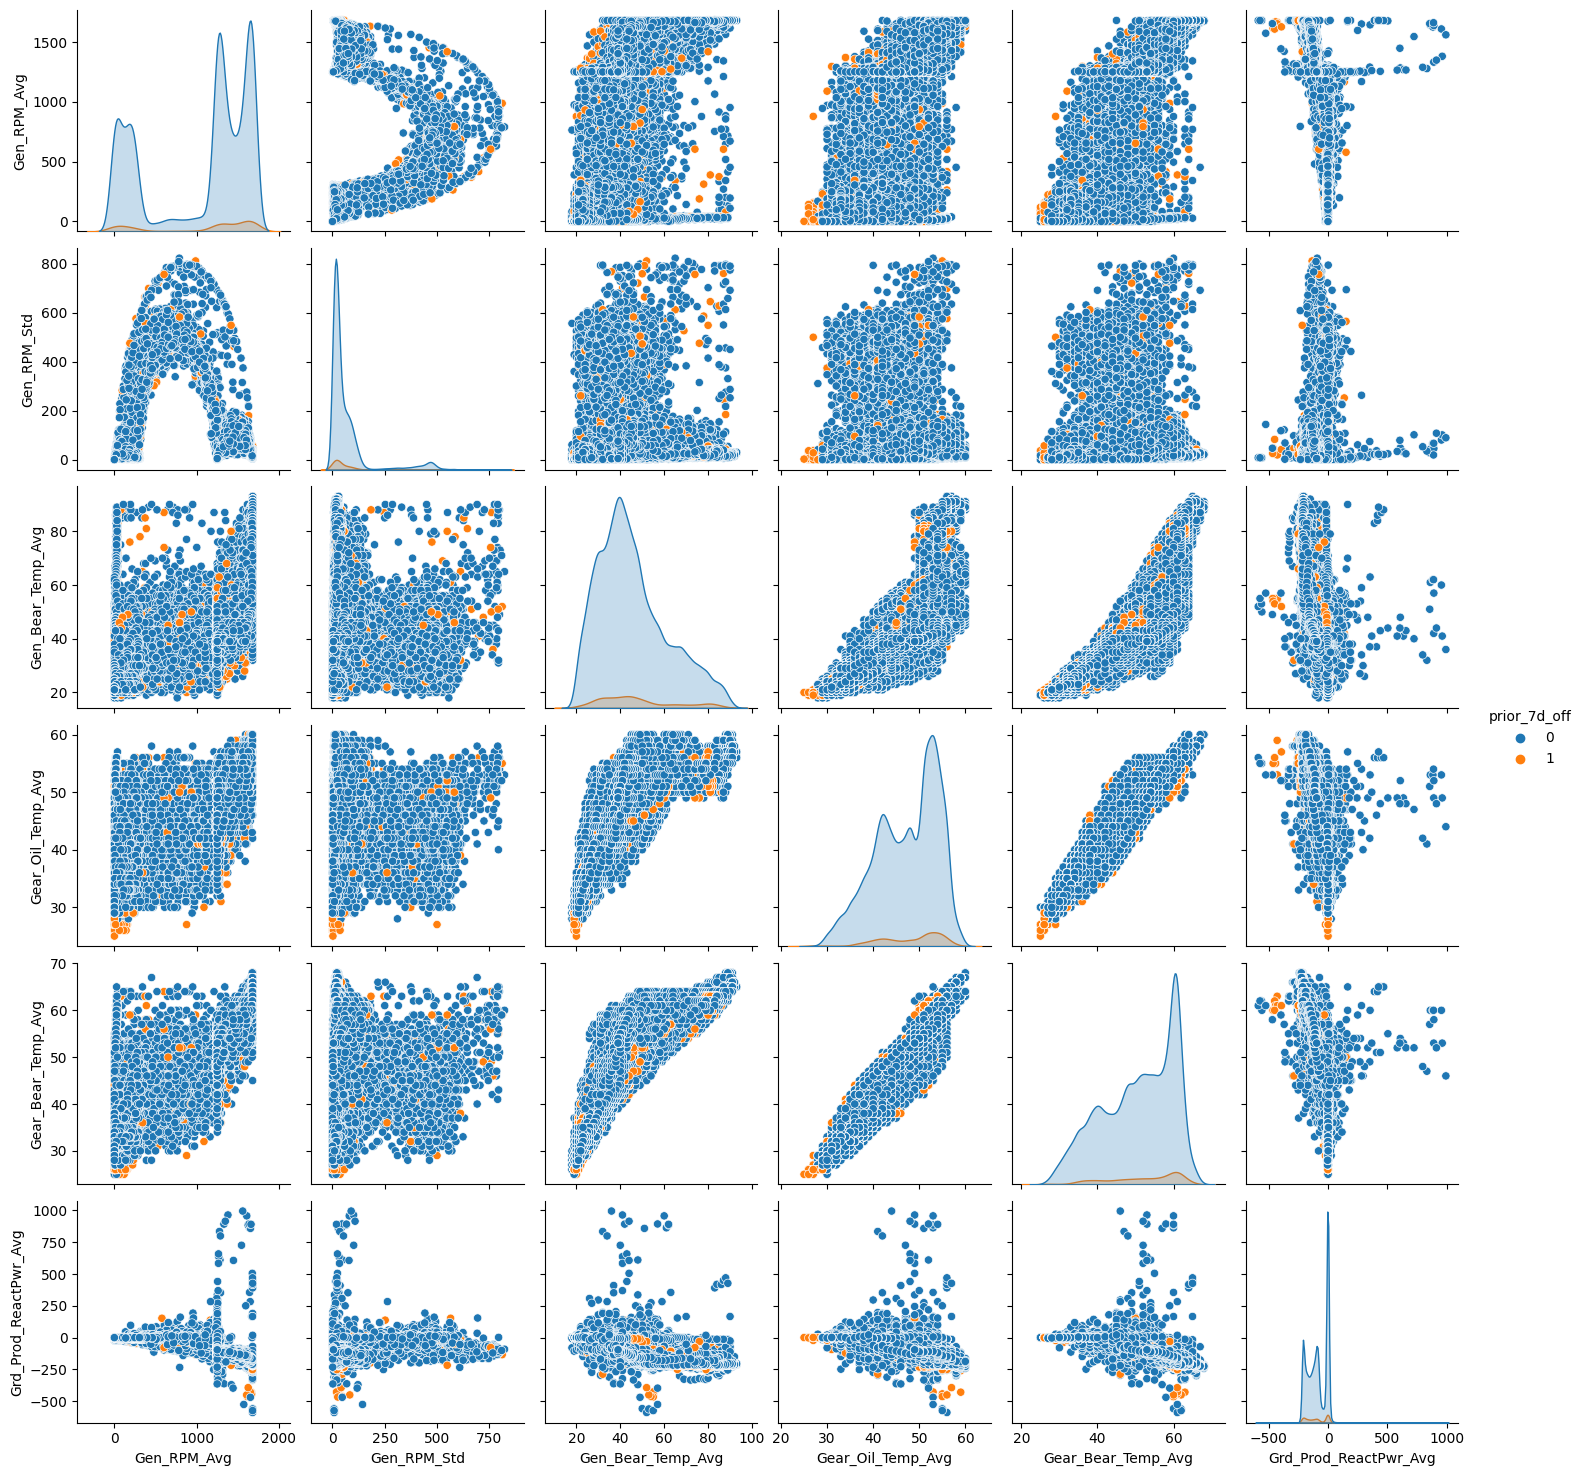

In [ ]:
import seaborn as sns
sns.pairplot(df[df.Turbine_ID=='T01'][[
    'Gen_RPM_Avg','Gen_RPM_Std','Gen_Bear_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Grd_Prod_ReactPwr_Avg',
    # 'Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Nac_Temp_Avg',
    'prior_7d_off'
    ]], hue='prior_7d_off')

In [ ]:
# df[df.select_dtypes(include='number')].corr()
df[df.Turbine_ID=='T01'].drop(columns=['epr','off_start','block_id','avg_block_windspeed','on']).select_dtypes(include='number').corr().prior_1h_off.sort_values()

low_wind_stop                 -0.975904
Grd_Prod_PsbleCap_Min         -0.033660
Grd_Prod_CosPhi_Avg           -0.032260
Grd_Prod_PsbleCap_Avg         -0.031099
Gear_Bear_Temp_Avg            -0.031089
Cont_VCP_ChokcoilTemp_Avg     -0.030654
Gen_RPM_Min                   -0.030608
Gen_RPM_Avg                   -0.029631
Rtr_RPM_Min                   -0.029570
Rtr_RPM_Avg                   -0.028601
Gear_Oil_Temp_Avg             -0.028399
Grd_Prod_Pwr_Max              -0.026275
Gen_RPM_Max                   -0.025626
Rtr_RPM_Max                   -0.025007
Gen_Bear_Temp_Avg             -0.025000
Gen_Bear2_Temp_Avg            -0.024597
Prod_LatestAvg_ActPwrGen1     -0.024334
Prod_LatestAvg_TotActPwr      -0.024326
Grd_Prod_Pwr_Avg              -0.024323
Gen_Phase3_Temp_Avg           -0.024185
Gen_Phase2_Temp_Avg           -0.023859
Gen_Phase1_Temp_Avg           -0.023330
Grd_Prod_CurPhse2_Avg         -0.023226
Grd_Prod_CurPhse1_Avg         -0.022855
Grd_Prod_CurPhse3_Avg         -0.022723


# Backup

In [ ]:
# add stop labels to df
df_stops = df_logs[df_logs.Time_Reset.isna()==False][['Timestamp','Turbine_ID','Remark','Time_Reset']].sort_values(by=['Turbine_ID','Timestamp'])
df_stops = df_stops.rename(columns={'Remark':'Stop_Remark'})

# convert to 10 min
df_stops.Timestamp = pd.to_datetime(df_stops.Timestamp.dt.strftime('%Y-%m-%d %H:%M').str[:-1] + '0:00')
df_stops.Time_Reset = pd.to_datetime(df_stops.Time_Reset.dt.strftime('%Y-%m-%d %H:%M').str[:-1] + '0:00') + pd.DateOffset(minutes=10)

# convert reset to last when multiple timestamp
df_stops.Time_Reset = df_stops.groupby(['Timestamp','Turbine_ID']).Time_Reset.transform('max')

# remove intermediate logs (consecutive logs over the same Time_Reset)
df_stops = df_stops[df_stops.Time_Reset != df_stops.groupby(['Turbine_ID']).Time_Reset.shift(1)]

# end df
df_stops_end = df_stops[['Turbine_ID','Time_Reset']].rename(columns={'Time_Reset':'Timestamp'})

# concat
df_stops = pd.concat([df_stops, df_stops_end]).sort_values(by=['Turbine_ID','Timestamp']).reset_index(drop=True)
df_stops.Stop_Remark = df_stops.groupby(['Turbine_ID']).Stop_Remark.ffill()
df_stops.Time_Reset = df_stops.groupby(['Turbine_ID']).Time_Reset.ffill()
df_stops = df_stops.set_index(['Timestamp']).groupby(['Turbine_ID','Stop_Remark','Time_Reset']).resample('10min').mean().reset_index().sort_values(by=['Turbine_ID','Timestamp'])
df_stops = df_stops[['Timestamp','Turbine_ID','Stop_Remark','Time_Reset']]

# # move stop to next timestamp
df_stops['stop'] = 1
df_stops[df_stops.Turbine_ID=='T01'].Stop_Remark.value_counts().head(10)

# df_stops[(df_stops.Timestamp.dt.strftime('%Y-%m-%d').isin(['2016-04-19','2016-04-29','2016-04-30','2016-04-31','2016-05-01','2016-05-02']))&(df_stops.Turbine_ID=='T01')]

Stop_Remark
Start auto-outyawing CCW          2180
High temperature T53: 125°C L3    1025
Pause pressed on keyboard          582
Pause over RCS  0                  576
Thermoerr. oil pump F410/ 52°C     207
OVPHwErr UDC   845V  state  6       72
High temp top ctrl.:  58°C          61
Start auto-outyawing CW             31
Ambient temperature high: 39°C      30
ExEx low voltage L1:   1V           29
Name: count, dtype: int64

In [ ]:
#merhge stops with signals
print(df.shape)
df = df.merge(df_stops, how='left', on=['Timestamp','Turbine_ID'])
print(df.shape)


(421056, 83)
(421056, 86)


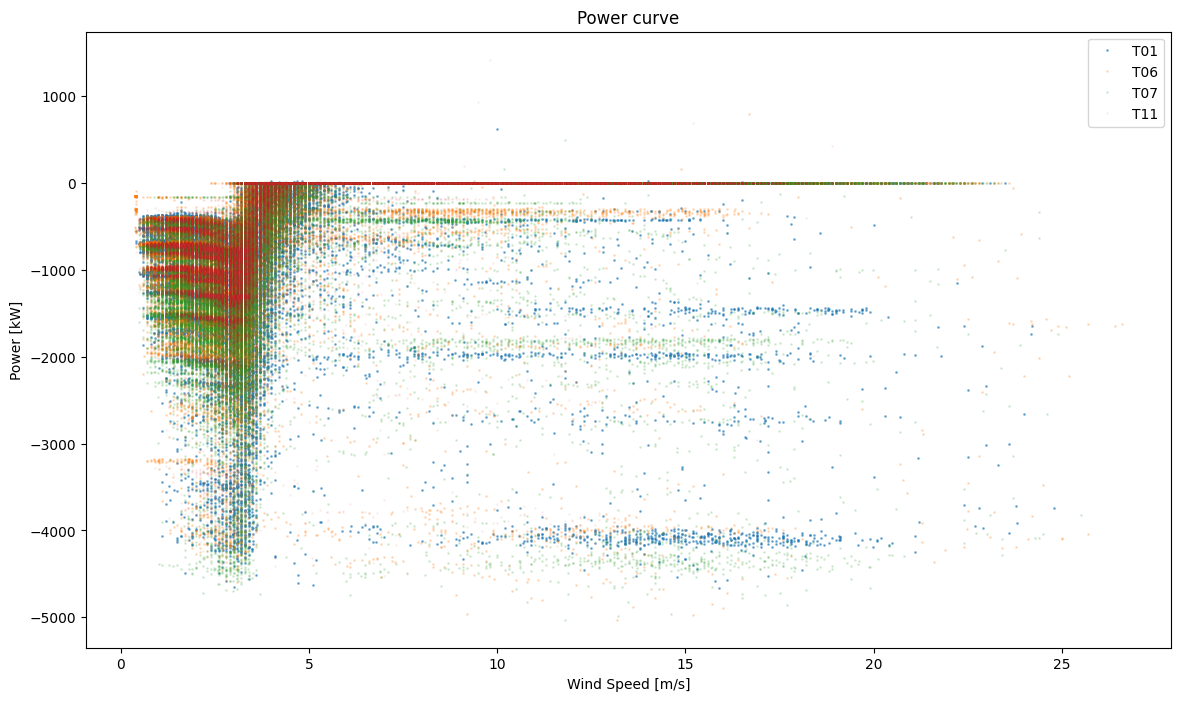

In [65]:
fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.plot(df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T01'].Prod_LatestAvg_ActPwrGen0, label='T01', marker='o', linestyle='None', markersize=1, alpha=0.5)
ax1.plot(df[df.Turbine_ID=='T06'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T06'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T06'].Prod_LatestAvg_ActPwrGen0, label='T06', marker='o', linestyle='None', markersize=1, alpha=0.2)
ax1.plot(df[df.Turbine_ID=='T07'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T07'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T07'].Prod_LatestAvg_ActPwrGen0, label='T07', marker='o', linestyle='None', markersize=1, alpha=0.15)
ax1.plot(df[df.Turbine_ID=='T11'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T11'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T11'].Prod_LatestAvg_ActPwrGen0, label='T11', marker='o', linestyle='None', markersize=1, alpha=0.05)

ax1.set_xlabel('Wind Speed [m/s]', fontsize=10)
ax1.set_ylabel('Power [kW]', fontsize=10)
ax1.set_title('Power curve', fontsize=12)
plt.legend()
plt.show()

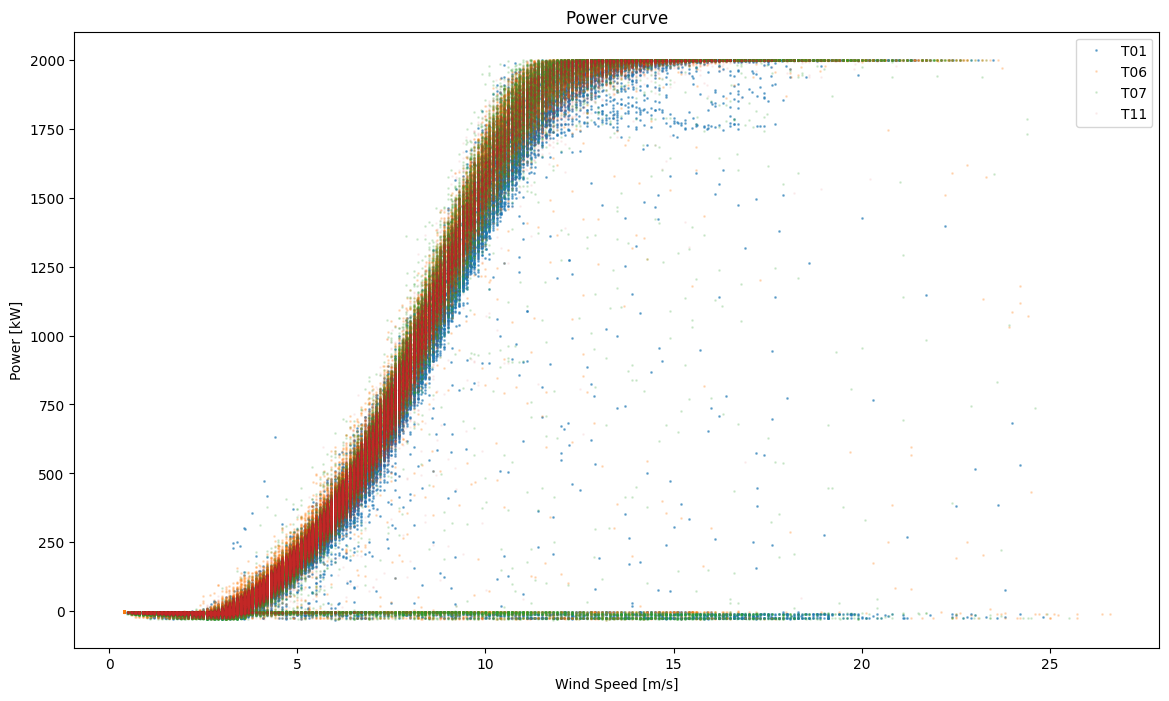

In [62]:
fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.plot(df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T01'].Grd_Prod_Pwr_Avg, label='T01', marker='o', linestyle='None', markersize=1, alpha=0.5)
ax1.plot(df[df.Turbine_ID=='T06'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T06'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T06'].Grd_Prod_Pwr_Avg, label='T06', marker='o', linestyle='None', markersize=1, alpha=0.2)
ax1.plot(df[df.Turbine_ID=='T07'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T07'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T07'].Grd_Prod_Pwr_Avg, label='T07', marker='o', linestyle='None', markersize=1, alpha=0.15)
ax1.plot(df[df.Turbine_ID=='T11'].Amb_WindSpeed_Avg + np.random.uniform(-0.01, 0.01, df[df.Turbine_ID=='T11'].Amb_WindSpeed_Avg.shape[0]), df[df.Turbine_ID=='T11'].Grd_Prod_Pwr_Avg, label='T11', marker='o', linestyle='None', markersize=1, alpha=0.05)

ax1.set_xlabel('Wind Speed [m/s]', fontsize=10)
ax1.set_ylabel('Power [kW]', fontsize=10)
ax1.set_title('Power curve', fontsize=12)
plt.legend()
plt.show()

<Axes: >

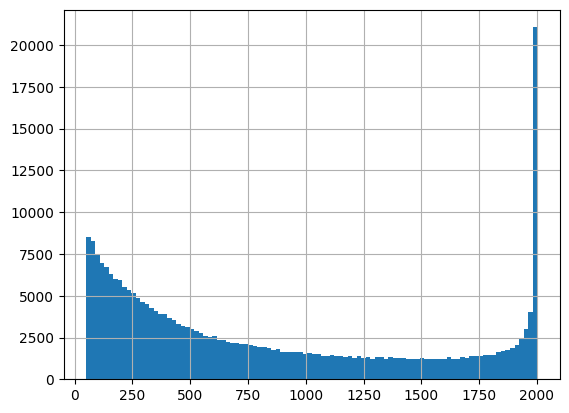

In [63]:
df[df.Grd_Prod_Pwr_Avg>50].Grd_Prod_Pwr_Avg.hist(bins=100)

In [100]:
day

'2016-01-16'

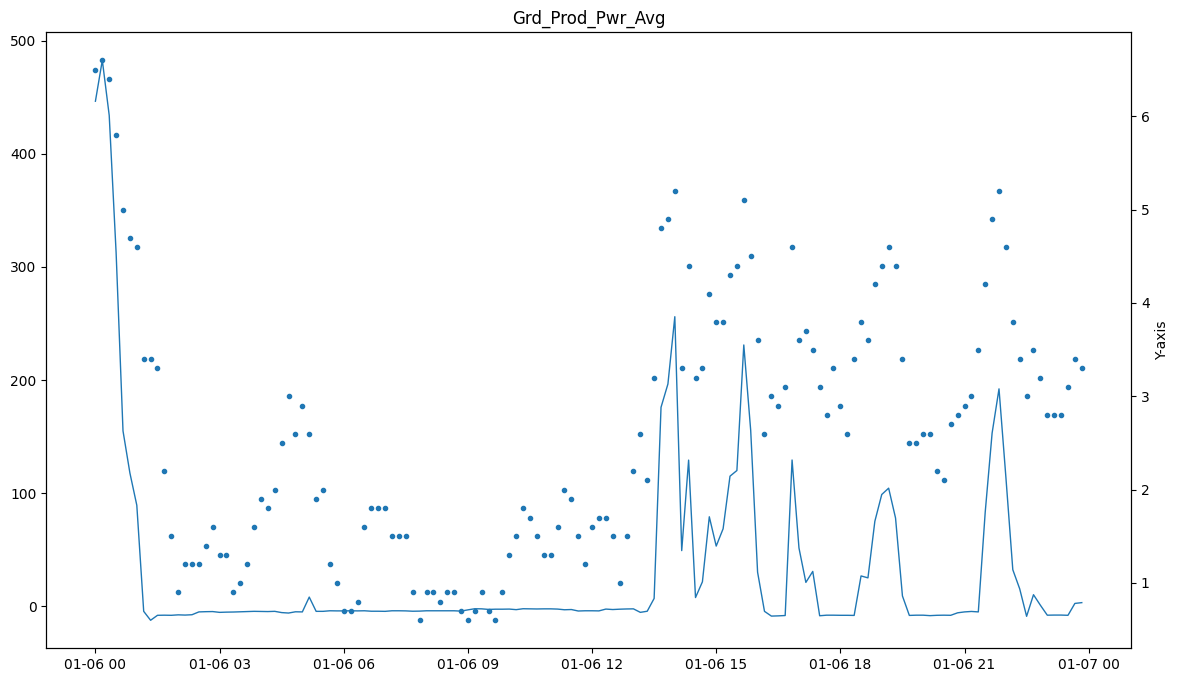

[nan]


In [101]:
# i = 2
days = df.Timestamp.sort_values().dt.strftime('%Y-%m-%d').unique()
day = days[i]
col = 'Grd_Prod_Pwr_Avg'

df_plt = df[(df.Turbine_ID == 'T01')&(df.Timestamp.dt.strftime('%Y-%m-%d').isin([day]))]

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(df_plt.Timestamp, df_plt[col].values, linewidth=1)
ax1.plot(df_plt[df_plt.stop==1].Timestamp, df_plt[df_plt.stop==1][col].values, marker='o', linestyle='None', markersize=3)

ax2 = ax1.twinx()
ax2.plot(df_plt.Timestamp, df_plt['Amb_WindSpeed_Avg'].values, marker='o', linestyle='None', markersize=3)
# plt.plot(df[df.Turbine_ID == df.Turbine_ID.unique()[1]].Timestamp, df[df.Turbine_ID == df.Turbine_ID.unique()[1]].Gen_RPM_Avg)
# plt.plot(df[df.Turbine_ID == df.Turbine_ID.unique()[2]].Timestamp, df[df.Turbine_ID == df.Turbine_ID.unique()[2]].Gen_RPM_Avg)
# plt.plot(df[df.Turbine_ID == df.Turbine_ID.unique()[3]].Timestamp, df[df.Turbine_ID == df.Turbine_ID.unique()[3]].Gen_RPM_Avg)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(col)
plt.show()

print(df_plt.Stop_Remark.unique())
i += 1

In [52]:
df.columns

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [137]:
df.Turbine_ID.unique()[0]

'T01'

In [39]:
df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg.shape[0]

105264

In [40]:
df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg + np.random.uniform(-0.1, 0.1, df[df.Turbine_ID=='T01'].Amb_WindSpeed_Avg.shape[0])

0         3.206416
1         3.103457
2         4.259495
3         4.476711
4         4.131995
            ...   
105259    6.200666
105260    6.389785
105261    5.309658
105262    5.344505
105263    5.469383
Name: Amb_WindSpeed_Avg, Length: 105264, dtype: float64